In [ ]:
#TASK 3

In [ ]:
#LINEAR REGRESSION USED

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/content/car data.csv')
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
df['Fuel_Type'].fillna(df['Fuel_Type'].mode()[0], inplace=True)
df['Selling_type'].fillna(df['Selling_type'].mode()[0], inplace=True)
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)

df = df.dropna()

In [21]:
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [22]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission', 'Owner'], drop_first=True)

In [9]:
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)  # Features
y = df['Selling_Price']                                  # Target variable

In [23]:
#SPLITTING THE MODEL
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred=model.predict(X_test)
print("Predicted Selling Prices:\n", y_pred)

Predicted Selling Prices:
 [12.90652545  8.82813961  5.36552682 -0.58558398  7.23602668  6.73116
  1.61242393  8.98819235  1.18917447  6.16688634 15.06996291  0.03658833
  7.41749063 13.68754951  6.14931555  3.18377578  3.25729052 10.38148597
 11.3559312  11.35334605  8.20045408  9.68008318  5.35558906  2.25147497
  8.99429619  3.02511975  6.47703228  1.37552674  3.18538714  3.25726584
 -0.23881542  8.11737656 -3.34213825  1.97722685  7.74451719  3.33834611
  7.24751589  4.08722751  5.02152475  4.87209339  5.24810001  5.55463483
  3.33260132  0.23996347 12.71369855 -0.13612256  7.26025551  7.21710423
  4.20167924  3.88017914  7.63148641  3.1829097  20.29298936 17.87979826
  7.73354608 11.16947846  4.08343867  9.68530878  0.95056871  8.55540257
  4.84678871]


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 16.59363180419335
R-squared: 0.27965223588846566


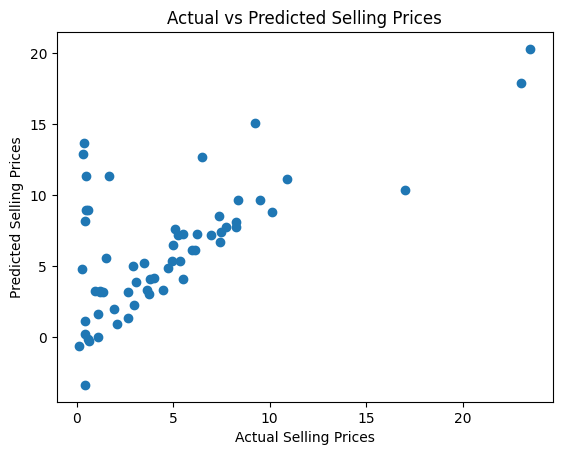

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Actual vs Predicted Selling Prices')
plt.show()